train loss:2.2991912968465287
=== epoch:1, train acc:0.223, test acc:0.213 ===
train loss:2.295087296552032
train loss:2.2919695381105556
train loss:2.2850487702595292
train loss:2.269980506829292
train loss:2.261216431856574
train loss:2.2317444489445957
train loss:2.214269103431608
train loss:2.2019579949791
train loss:2.146328069468282
train loss:2.127407365539186
train loss:2.080127384932388
train loss:2.0570397808498275
train loss:2.0198898100145004
train loss:1.9255833783437126
train loss:1.879615464405417
train loss:1.778030155713133
train loss:1.756955262698746
train loss:1.644312766794076
train loss:1.5769069403752107
train loss:1.5058919068853833
train loss:1.4362135478472648
train loss:1.3160125375270755
train loss:1.286498436506116
train loss:1.177149747393934
train loss:1.2167399421151395
train loss:1.1440478218611723
train loss:0.9058541484062254
train loss:0.9988139761368023
train loss:0.9357795325633047
train loss:0.9500201968760383
train loss:0.723358154017211
train lo

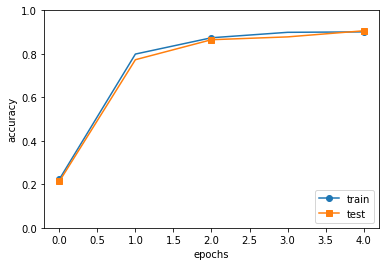

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 5 #20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)

trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()